In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Análisis y exploración de datos

In [2]:
remuneraciones = pd.read_csv('Remuneraciones.csv', header=0, skiprows=[1])

In [3]:
# Vista general del dataset
print(remuneraciones.head())

  Periodo                Industria   Genero  Valor
0  feb-96  agricultura y ganaderia  Mujeres  406.8
1  mar-96  agricultura y ganaderia  Mujeres  399.7
2  abr-96  agricultura y ganaderia  Mujeres  375.9
3  may-96  agricultura y ganaderia  Mujeres  395.6
4  jun-96  agricultura y ganaderia  Mujeres  554.0


In [4]:
# Comprobación de balance entre regisros
print(remuneraciones['Genero'].value_counts())

Genero
Varones    18354
Mujeres    18353
Name: count, dtype: int64


##### Se puede observar que el paso anterior devuelve un registro menos en el género mujeres. A continuación se trabaja para corregir este inconveniente.

In [5]:
print(remuneraciones.shape[0])

36707


In [6]:
# Cargar sin modificar nada, incluyendo posibles valores vacíos
remuneraciones = pd.read_csv("Remuneraciones.csv", keep_default_na=False)

In [7]:
# Mostrar cantidad de filas
print("Cantidad total de filas:", remuneraciones.shape[0])

Cantidad total de filas: 36708


In [8]:
# Se vuelve a comprobar el balance entre registros
print(remuneraciones['Genero'].value_counts())

Genero
Mujeres    18354
Varones    18354
Name: count, dtype: int64


##### Si bien un solo registro no hubiese afectado a grandes rasgos los resultados, es importante mantener una paridad entre géneros durante todo el estudio de la brecha salarial en Argentina.

In [9]:
# Reemplazo de abreviaturas en español por números
meses = {
    'ene': '01', 'feb': '02', 'mar': '03', 'abr': '04',
    'may': '05', 'jun': '06', 'jul': '07', 'ago': '08',
    'sep': '09', 'oct': '10', 'nov': '11', 'dic': '12'
}

# Aplicación del reemplazo
remuneraciones['Periodo'] = remuneraciones['Periodo'].str.lower().replace(meses, regex=True)

# Conversión a datetime
remuneraciones['Periodo'] = pd.to_datetime('01-' + remuneraciones['Periodo'], format='%d-%m-%y')

#### Evolución de la remuneración en el tiempo.

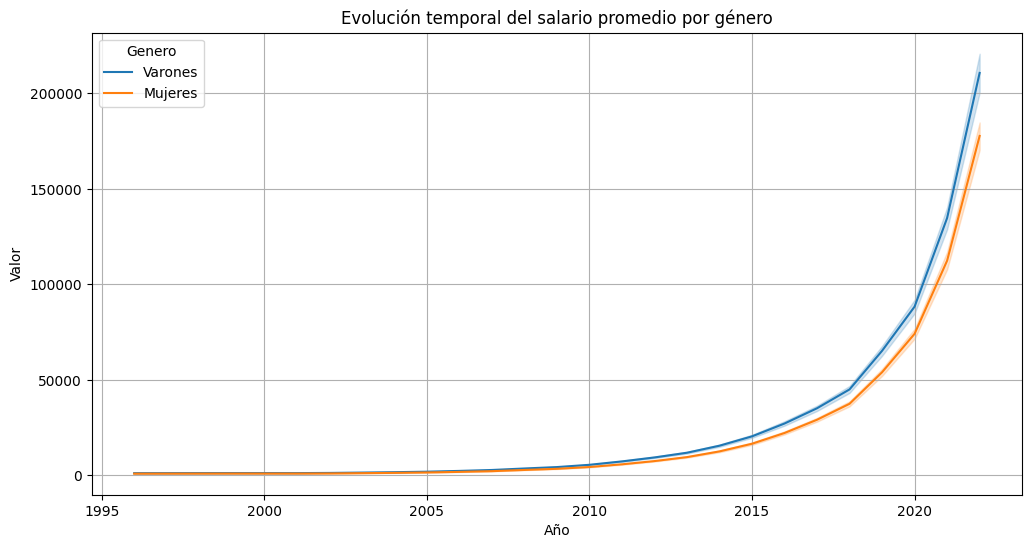

In [10]:
remuneraciones['Periodo'] = pd.to_datetime(remuneraciones['Periodo'], format='%b-%y')
remuneraciones['Año'] = remuneraciones['Periodo'].dt.year

plt.figure(figsize=(12, 6))
sns.lineplot(data=remuneraciones, x='Año', y='Valor',hue='Genero',hue_order=['Varones', 'Mujeres'], estimator='mean')
plt.title('Evolución temporal del salario promedio por género')
plt.grid(True)
plt.show()

- Ambas líneas muestran un crecimiento sostenido en las remuneraciones a lo largo del tiempo. Esto es esperable debido a inflación, aumentos salariales y cambios económicos estructurales.
- Aunque ambas curvas crecen, la de los varones se mantiene por encima de la de las mujeres en todo el período y esto evidencia una brecha salarial persistente a lo largo de las décadas donde se acentúa después de 2010.
- La distancia entre las dos curvas aumenta lo que sugiere que la brecha no solo se mantiene, sino que está creciendo en términos absolutos.
##### A pesar del crecimiento general en las remuneraciones del empleo registrado en el sector privado argentino, se observa una brecha salarial estructural y creciente entre varones y mujeres. Este gráfico es una evidencia clara de que, aunque ambos grupos mejoran, el género sigue siendo un factor asociado a una desigualdad en la retribución económica.

#### Distribución de sueldos generales y por género.

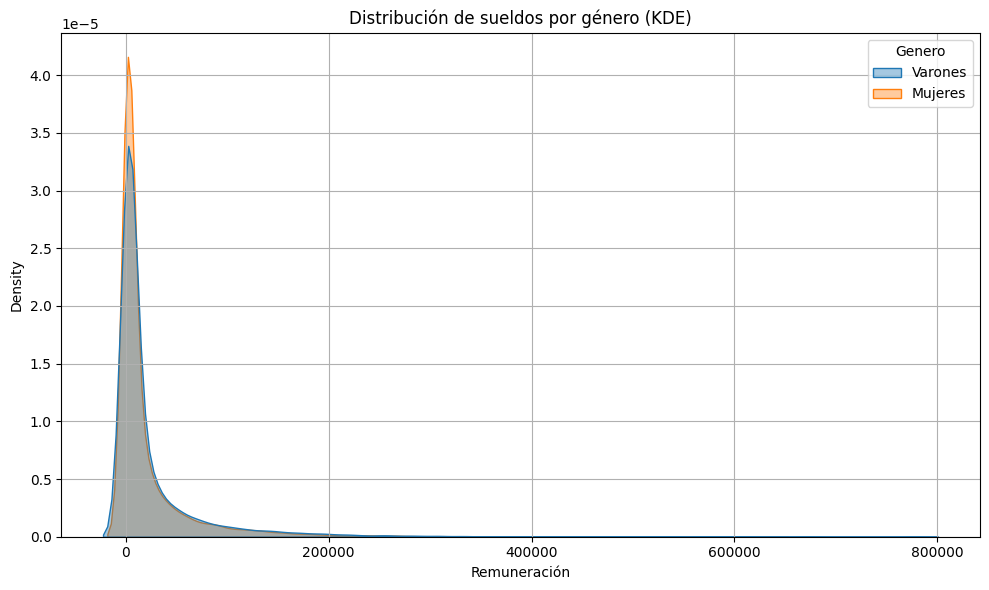

In [11]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=remuneraciones, x='Valor', hue='Genero',hue_order=['Varones', 'Mujeres'], fill=True, common_norm=False, alpha=0.4)
plt.title('Distribución de sueldos por género (KDE)')
plt.xlabel('Remuneración')
plt.grid(True)
plt.tight_layout()
plt.show()

- Ambas curvas están fuertemente sesgadas a la derecha, es decir que la mayoría de las personas tienen sueldos bajos o moderados, y pocos casos tiene sueldos muy altos (outliers).
- La curva de las mujeres (naranja) tiene su máximo en valores más bajos que la de los varones. En términos proporcionales, esto sugiere que hay una mayor concentración de mujeres con sueldos más bajos respecto a los varones.
- La curva de los varones (azul) se extiende levemente más hacia la derecha, lo que indica que hay más varones en los rangos más altos de remuneración.
##### Este gráfico confirma que existen asimetrías en la distribución salarial por género: las mujeres tienden a concentrarse más en los tramos salariales bajos, mientras que los varones están algo más distribuidos en el espectro, incluso en los valores más altos. Aunque la diferencia no sea extremadamente marcada en la densidad total, es un indicio estadístico relevante de la brecha y segmentación salarial entre géneros.

#### Sueldos promedio por industria y género.

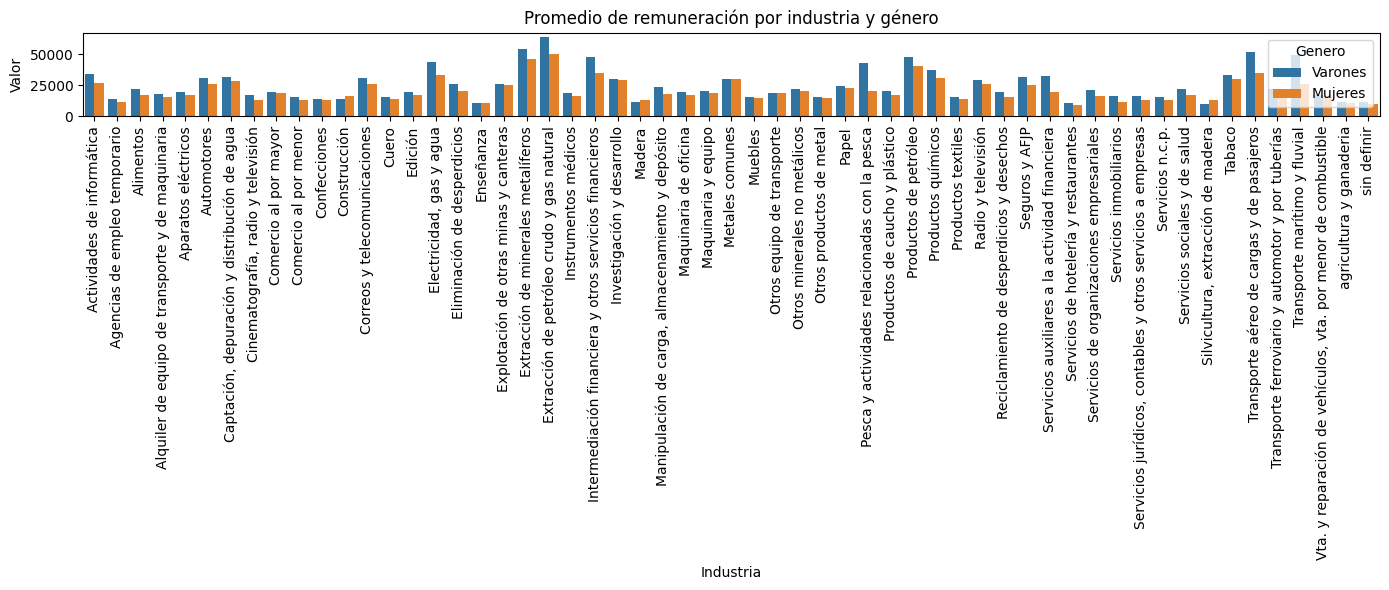

In [12]:
industria_promedio = remuneraciones.groupby(['Industria', 'Genero'])['Valor'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=industria_promedio, x='Industria', y='Valor', hue='Genero',hue_order=['Varones', 'Mujeres'])
plt.xticks(rotation=90)
plt.title('Promedio de remuneración por industria y género')
plt.tight_layout()
plt.show()

- En algunas industrias la brecha es muy notoria:
    - Intermediación financiera y otros servicios financieros
    - Explotación de otras minas y canteras
    - Petróleo crudo y gas natural
    - Servicios empresariales
- Estas diferencias pueden reflejar tanto segmentación vertical (más varones en puestos jerárquicos) como horizontal (roles diferentes dentro de la misma industria).
- En las industrias con mayor promedio salarial tambien se observa brecha de genero.
- En las industrias con menor remuneracion suele haber mayor participacion femenina, lo que contribuye a mantener la brecha a nivel general.
##### Este gráfico permite visualizar de forma clara y contundente la presencia sistemática de la brecha salarial de género en el sector privado argentino, segmentada por rama de actividad. No solo se observa que los varones tienden a tener mayores remuneraciones promedio en casi todas las industrias, sino que las industrias más rentables suelen mostrar también las mayores desigualdades. Esto refuerza la necesidad de políticas públicas y privadas orientadas a reducir la desigualdad estructural de género en el mercado laboral.

#### Heatmap de correlación entre variables numéricas.

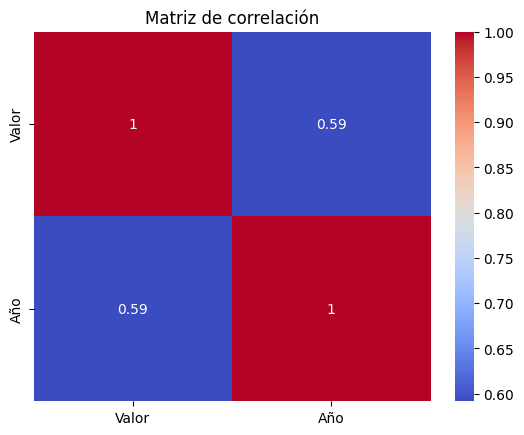

In [13]:
df_numeric = remuneraciones[['Valor', 'Año']]  
corr = df_numeric.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

- El valor 1.00 en la diagonal principal indica la autocorrelación perfecta de cada variable consigo misma (esperado).
- El valor 0.59 entre Valor y Año sugiere una correlación positiva moderada entre el año y la remuneración.
    - Esto indica que, en general, a medida que pasan los años, la remuneración promedio tiende a aumentar.
    - No es una correlación perfecta, pero sí suficientemente significativa como para considerarla una tendencia ascendente general en el tiempo.
##### La matriz de correlación presentada analiza la relación lineal entre dos variables numéricas: el valor de la remuneración y el año. El coeficiente de correlación de Pearson obtenido entre ambas variables es de 0.59, lo cual indica una correlación positiva moderada. Este valor sugiere que, en general, las remuneraciones tienden a aumentar con el paso del tiempo. Es decir, existe una tendencia ascendente en los sueldos promedio a lo largo del período analizado (1996-2022), aunque no se trata de una relación perfectamente lineal. Este comportamiento también se vio reflejado en los gráficos de evolución salarial por año. Además, contribuye en parte a explicar las variaciones en las remuneraciones. Este análisis contribuye a contextualizar la evolución de los sueldos y refuerza el valor explicativo del tiempo en el estudio de la brecha salarial de género.

#### Outliers usando el IQR

In [37]:
Q1 = remuneraciones['Valor'].quantile(0.25)
Q3 = remuneraciones['Valor'].quantile(0.75)
IQR = Q3 - Q1

outliers = remuneraciones[(remuneraciones['Valor'] < Q1 - 1.5 * IQR) | (remuneraciones['Valor'] > Q3 + 1.5 * IQR)]
print(f"Cantidad de outliers detectados: {len(outliers)}")

Cantidad de outliers detectados: 5035


- Identificación de extremos salariales:
    - Hay 5035 valores atípicos en los sueldos registrados. Esto es importante porque los outliers (por ejemplo, sueldos extremadamente altos o bajos) pueden distorsionar los resultados, especialmente si se hace clustering o normalización.
- Ayuda a decidir si:
    - Se eliminarán o tratarán esos valores (con winsorization, log transform, etc.).
    - Conviene escalar o transformar la variable (logaritmo, z-score) para suavizar el impacto de los extremos.
- Complemento con la matriz de correlación:
    - Si se detecta una correlación fuerte (como entre Año y Valor, r=0.59), y muchos outliers, se plantean las siguientes preguntas:
        - ¿Los outliers están relacionados con ciertos años?
        - ¿El aumento salarial en los últimos años está generando esos extremos?

## Preprocesamiento

In [30]:
# Reemplazar 'Varones' por 0 y 'Mujeres' por 1
remuneraciones['Genero'] = remuneraciones['Genero'].map({'Varones': 0, 'Mujeres': 1})

# Codificar 'Industria' con LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
remuneraciones['Industria'] = le.fit_transform(remuneraciones['Industria'])

In [31]:
# Selección de variables 
features = ['Valor', 'Año', 'Genero', 'Industria']

In [ ]:
# Escalar los datos
x= remuneraciones[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(

KeyError: "['Cluster', 'Cluster_DBSCAN', 'PCA1', 'PCA2'] not in index"

## Modelo de clustering

##### Luego del análisis exploratorio, se avanza hacia la construcción de un modelo de aprendizaje no supervisado con el objetivo de identificar patrones ocultos en las remuneraciones del empleo registrado privado en Argentina, sin necesidad de conocer previamente las etiquetas o categorías.

##### Se opto por utilizar el algoritmo K-Means, debido a:
- Su eficiencia para conjuntos medianamente grandes.
- Su capacidad para trabajar con variables numéricas como el valor de la remuneración.
- Su interpretación sencilla: los datos se agrupan en torno a centroides representando los puntos medios de cada cluster. 

##### Para definir cuántos grupos usar en el modelo, se aplicó el método del codo, que evalúa la inercia (variabilidad dentro de los clusters) en función del número de grupos (k).

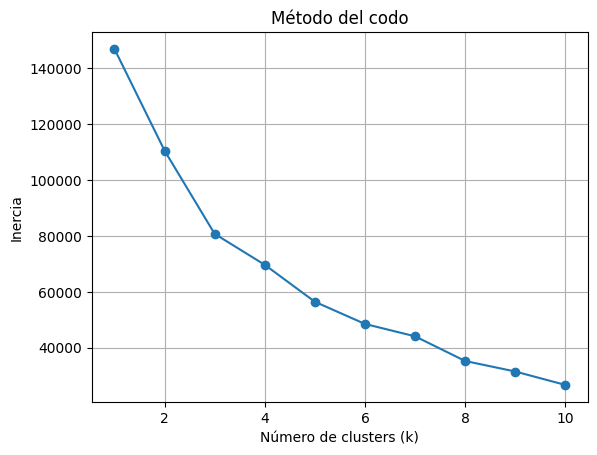

In [18]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.grid(True)
plt.show()

##### El gráfico mostró un cambio de pendiente significativo en k=3, lo que sugiere que tres clusters permiten un buen equilibrio entre simplicidad y segmentacion informativa.

##### Se entrenó el modelo que generó una nueva variable (Cluster) que indica a qué grupo pertenece cada observación. Posteriormente, se analiza el contenido de cada cluster para comprender sus características.

In [19]:
kmeans = KMeans(n_clusters=3, random_state=42)
remuneraciones['Cluster'] = kmeans.fit_predict(X_scaled)

##### Este gráfico de barras de género por cluster permite observar cómo se distribuye la variable género en cada grupo.

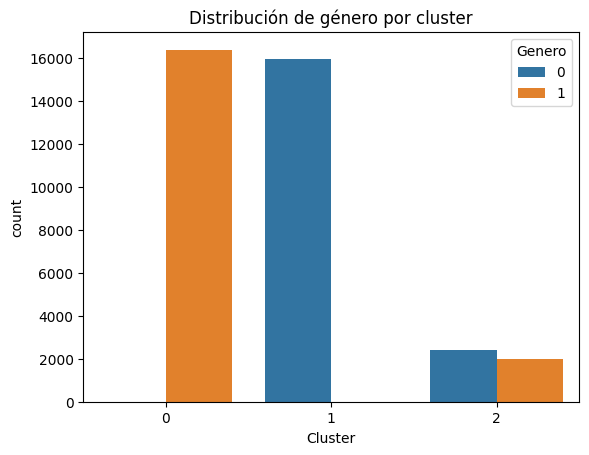

In [20]:
sns.countplot(data=remuneraciones, x='Cluster', hue='Genero')
plt.title('Distribución de género por cluster')
plt.show()

- Cluster 0 y 1: tienen una distribución bastante pareja entre varones y mujeres. Esto sugiere que estos clusters podrían estar agrupando individuos con características similares en cuanto a sueldo sin una fuerte segmentación por género.
- Cluster 2: tiene menos registros en total, y también una distribución pareja, aunque más reducida.
##### Los clusters no parecen estar divididos principalmente por género. Es un dato relevante para concluir que el género no fue un factor dominante en la segmentación por K-Means, al menos con las variables seleccionadas.

##### Este boxplot de remuneraciones por cluster evidencia las diferencias en las medianas y la dispersión de los valores.

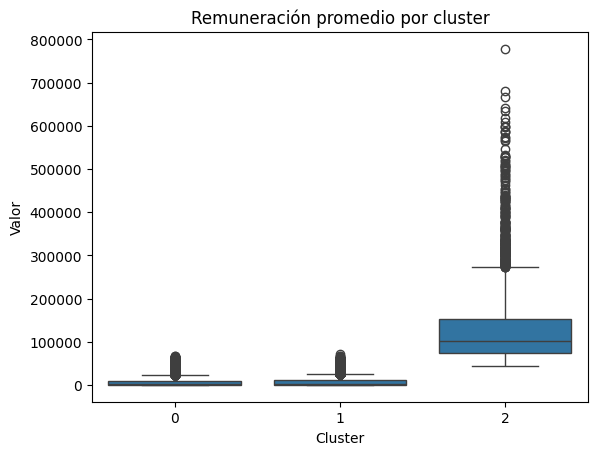

In [21]:
sns.boxplot(data=remuneraciones, x='Cluster', y='Valor')
plt.title('Remuneración promedio por cluster')
plt.show()

- Clusters 0 y 1: presentan una distribución similar, con sueldos más bajos y con menor dispersión.
- Cluster 2: presenta remuneraciones mucho más altas, mayor dispersión y presencia de outliers, lo que sugiere que agrupa a personas con sueldos significativamente más elevados.
##### Los clusters están diferenciando principalmente por nivel de remuneración. Esto tiene sentido, ya que probablemente sea la variable con mayor varianza y peso dentro del clustering.

#### El algoritmo de clustering identificó tres grupos principales: dos con sueldos bajos similares en distribución de género, y uno minoritario con sueldos altos, posiblemente correspondiente a posiciones jerárquicas o sectores mejor remunerados. Esto sugiere que la segmentación principal ocurre por nivel de ingresos y no tanto por género o año.

## Visualización y análisis

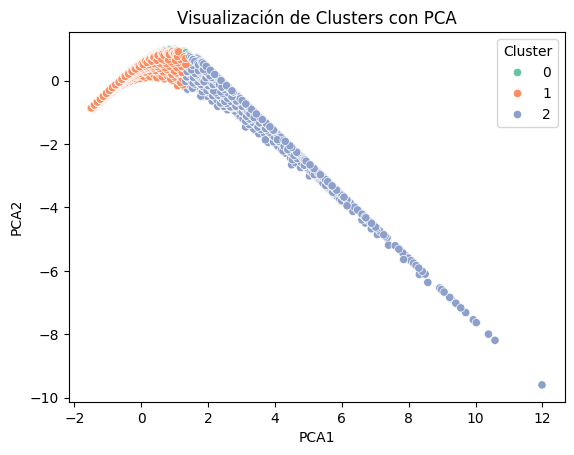

In [22]:
# Selección de variables numéricas escaladas
X_scaled = scaler.fit_transform(remuneraciones[['Valor', 'Año']])  # o las variables que uses en clustering

# PCA para reducción a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear DataFrame con los componentes y los clusters
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = remuneraciones['Cluster']

# Visualización
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Visualización de Clusters con PCA')
plt.show()